In [1]:
from sklearn.preprocessing import PolynomialFeatures

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
from sklearn.datasets import load_breast_cancer

In [4]:
from sklearn.datasets import load_breast_cancer

data = load_breast_cancer()

X= data.data
y= data.target

In [5]:
polf = PolynomialFeatures(degree=2)

In [6]:
from sklearn.model_selection import ShuffleSplit
ss = ShuffleSplit(n_splits=1,
                 train_size=0.8,
                 test_size=0.2,
                 random_state=0)
train_index, test_index = next(ss.split(X, y))

X_train, X_test = X[train_index], X[test_index]
y_train, y_test = y[train_index], y[test_index]

In [7]:
polf.fit(X_train)

PolynomialFeatures(degree=2, include_bias=True, interaction_only=False,
                   order='C')

In [8]:
X_train_poly = polf.transform(X_train)
X_test_poly = polf.transform(X_test)

In [9]:
X_train_poly.shape, X_train.shape

((455, 496), (455, 30))

In [10]:
X_test.shape

(114, 30)

In [11]:
from sklearn import linear_model
clf = linear_model.LogisticRegression(solver='liblinear')

In [12]:
clf.fit(X_train_poly, y_train)
clf.score(X_test_poly, y_test)

0.9649122807017544

In [13]:
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.956140350877193

In [14]:
from sklearn.decomposition import PCA

In [15]:
pca = PCA()

In [16]:
pca.fit(X_train_poly)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

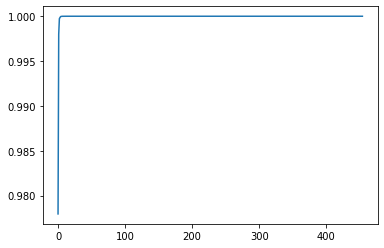

In [17]:
plt.plot(np.add.accumulate(pca.explained_variance_ratio_))

In [18]:
scores = []

n_features = X_train_poly.shape[1]
i_range = range(1,n_features, 10)

    
X_train_poly_pca = pca.transform(X_train_poly)
X_test_poly_pca = pca.transform(X_test_poly)
    
for i in i_range:
    clf.fit(X_train_poly_pca[:, 0:i], y_train)
    scores.append( clf.score(X_test_poly_pca[:, 0:i],y_test))
    
scores = np.array(scores)

/home/ma/.bin/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/ma/.bin/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/ma/.bin/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/ma/.bin/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/ma/.bin/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number o

In [19]:
scores

array([0.87719298, 0.93859649, 0.96491228, 0.96491228, 0.96491228,
       0.95614035, 0.96491228, 0.96491228, 0.96491228, 0.96491228,
       0.96491228, 0.95614035, 0.96491228, 0.96491228, 0.96491228,
       0.95614035, 0.96491228, 0.96491228, 0.96491228, 0.96491228,
       0.96491228, 0.96491228, 0.96491228, 0.96491228, 0.96491228,
       0.95614035, 0.96491228, 0.96491228, 0.96491228, 0.95614035,
       0.95614035, 0.96491228, 0.96491228, 0.96491228, 0.96491228,
       0.96491228, 0.96491228, 0.96491228, 0.96491228, 0.95614035,
       0.95614035, 0.96491228, 0.96491228, 0.95614035, 0.96491228,
       0.96491228, 0.96491228, 0.96491228, 0.96491228, 0.96491228])

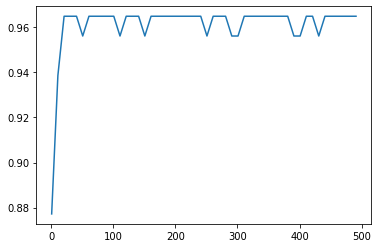

In [20]:
plt.plot(i_range, scores)

In [21]:
for d in [2,3,4]:
    print("d=", d)
    
    polf = PolynomialFeatures(degree=d)
    polf.fit(X_train)
    X_train_poly = polf.transform(X_train)
    X_test_poly = polf.transform(X_test)
    
    
    pca.fit(X_test_poly)
    X_train_poly_pca = pca.transform(X_train_poly)
    X_test_poly_pca = pca.transform(X_test_poly)
    
    scores = []
    
    n_features = min(500, X_train_poly.shape[1])
    i_range = range(1, n_features,10)
    
    print("max dimension: ", X_train_poly.shape[1])
    
    print("i=", end="")
    for i in i_range:
        print(i, end=",")
        clf.fit(X_train_poly_pca[:, 0:i], y_train)
        scores.append( clf.score(X_test_poly_pca[:, 0:1]))
    print("")
    
    scores = np.array(scores)
    
    plt.plot(i_range, scores, label="d={0}".format(d))
    
plt.legend()
                    

d= 2
max dimension:  496
i=1,

TypeError: score() missing 1 required positional argument: 'y'